# Data Exploration 01

We are looking at the following data found [here](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE180122)

```
Single cell RNA sequencing data was collected from 150 day old human cortical organoid slice cultures grown at the air-liquid interface (ALI-COs) from control and ALS/FTD patient-specific induced pluripotent stem cell (iPSC) lines harbouring the C9ORF72 hexanucleotide repeat expansion mutation. Data collection included ALI-COs derived from the following iPSC lines: WTSli042-B (WTS42b) and A18945 (EpiC) for healthy controls, CS30iALS-C9nxx (CS30) and CS29iALS-C9nxx (CS29) for ALS/FTD, and CS29iALS-C9n1.ISOxx (ISO29), a mutation-corrected isogenic line. A total of 148,223 cells were processed over two batches.
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statdepth
import plotly.express as px 

In [3]:
df1 = pd.read_csv('../data/raw/GSE180122_C9_batch1_data.csv.gz', compression='gzip', nrows=1000)
df1.head()

,gene,EpiC__AAACCCAAGCGTGAGT-1,EpiC__AAACCCAAGGAACTAT-1,EpiC__AAACCCAGTATGGAGC-1,EpiC__AAACCCAGTCCAACGC-1,EpiC__AAACCCAGTCGATTTG-1,EpiC__AAACCCATCGCAGTCG-1,EpiC__AAACCCATCGTCAACA-1,EpiC__AAACGAAAGAAATTGC-1,EpiC__AAACGAAGTCTGCAAT-1,...,WTS1_TTTGGTTCAAGTGGCA-2,WTS1_TTTGGTTGTACCTAGT-2,WTS1_TTTGGTTTCCAACACA-2,WTS1_TTTGGTTTCCGTGTCT-2,WTS1_TTTGGTTTCGGATACT-2,WTS1_TTTGTTGAGAACCGCA-2,WTS1_TTTGTTGCAACGACTT-2,WTS1_TTTGTTGCACGTACAT-2,WTS1_TTTGTTGGTAGGTTTC-2,WTS1_TTTGTTGGTCCGCAGT-2
0,RP11-34P13.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,RP11-34P13.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,FO538757.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
3,FO538757.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.02899,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.057686,0.0,0.000000
4,AP006222.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64139,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.507665


In [5]:
df1 = df1.set_index('gene')

<AxesSubplot:>

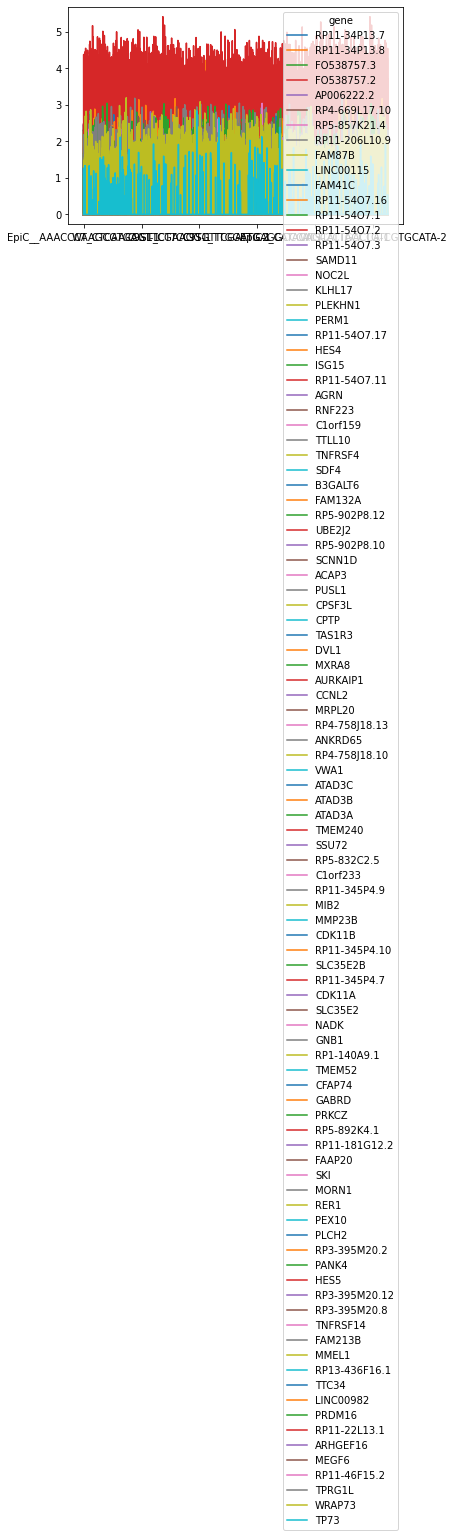

In [15]:
df1.T.iloc[:, 0:100].plot();

In [16]:
df2 = pd.read_csv('../data/raw/GSE180122_C9_batch2_data.csv.gz', compression='gzip', nrows=1000)
df2.head()

,gene,CS29A_AAACCCAAGAGCAGCT-1,CS29A_AAACCCAAGGGTACGT-1,CS29A_AAACCCAAGTAAACGT-1,CS29A_AAACCCAAGTTCATCG-1,CS29A_AAACCCACATAACTCG-1,CS29A_AAACCCACATGACTGT-1,CS29A_AAACCCAGTCAGATTC-1,CS29A_AAACCCAGTCATCAGT-1,CS29A_AAACCCAGTCTTCCGT-1,...,ISOB_TTTGTTGAGGATATAC-1,ISOB_TTTGTTGAGTCAGCCC-1,ISOB_TTTGTTGCACCATAAC-1,ISOB_TTTGTTGCAGAGATTA-1,ISOB_TTTGTTGGTCGAGTGA-1,ISOB_TTTGTTGGTTCATCGA-1,ISOB_TTTGTTGTCAAGAGGC-1,ISOB_TTTGTTGTCACTCGAA-1,ISOB_TTTGTTGTCCCTTGGT-1,ISOB_TTTGTTGTCTTCACGC-1
0,RP11-34P13.7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,RP11-34P13.8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,FO538757.3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,FO538757.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.647624,...,0.0,0.00000,0.0,0.0,0.0,1.438017,0.000000,1.124465,1.120133,0.0
4,AP006222.2,0.0,0.0,0.0,0.0,0.0,0.0,0.277515,0.0,0.647624,...,0.0,1.12573,0.0,0.0,0.0,0.000000,0.353141,0.000000,0.000000,0.0


In [19]:
df2 = df2.set_index('gene')

In [20]:
df2.head()

,CS29A_AAACCCAAGAGCAGCT-1,CS29A_AAACCCAAGGGTACGT-1,CS29A_AAACCCAAGTAAACGT-1,CS29A_AAACCCAAGTTCATCG-1,CS29A_AAACCCACATAACTCG-1,CS29A_AAACCCACATGACTGT-1,CS29A_AAACCCAGTCAGATTC-1,CS29A_AAACCCAGTCATCAGT-1,CS29A_AAACCCAGTCTTCCGT-1,CS29A_AAACCCATCCACCCTA-1,...,ISOB_TTTGTTGAGGATATAC-1,ISOB_TTTGTTGAGTCAGCCC-1,ISOB_TTTGTTGCACCATAAC-1,ISOB_TTTGTTGCAGAGATTA-1,ISOB_TTTGTTGGTCGAGTGA-1,ISOB_TTTGTTGGTTCATCGA-1,ISOB_TTTGTTGTCAAGAGGC-1,ISOB_TTTGTTGTCACTCGAA-1,ISOB_TTTGTTGTCCCTTGGT-1,ISOB_TTTGTTGTCTTCACGC-1
gene,,,,,,,,,,,,,,,,,,,,,
RP11-34P13.7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
RP11-34P13.8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
FO538757.3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
FO538757.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.647624,0.953873,...,0.0,0.00000,0.0,0.0,0.0,1.438017,0.000000,1.124465,1.120133,0.0
AP006222.2,0.0,0.0,0.0,0.0,0.0,0.0,0.277515,0.0,0.647624,0.000000,...,0.0,1.12573,0.0,0.0,0.0,0.000000,0.353141,0.000000,0.000000,0.0


In [23]:
len(df2.columns), len(set(df2.columns))

(45994, 45994)